## Setup


In [1]:
from jmd_imagescraper.core import *
from pathlib import Path
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, GlobalAvgPool2D, Dropout, Flatten, Dense
from tensorflow.keras import activations
import numpy as np
import matplotlib.pyplot as plt

root = Path().cwd()/"images"

In [13]:
results_no = 333

duckduckgo_search(root, "Clowns", "scary clowns", max_results=results_no)
duckduckgo_search(root, "Rabbit", "rabbit", max_results=results_no)
duckduckgo_search(root, "Moon", "moon", max_results=results_no)

Duckduckgo search: scary clowns


Duckduckgo search: rabbit


Duckduckgo search: moon


[WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/001_bc7d5fb6.jpg'),
 WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/002_c08cc4eb.jpg'),
 WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/003_82ef1992.jpg'),
 WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/004_a3a256bd.jpg'),
 WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/005_d55b81d1.jpg'),
 WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/006_0f949dfa.jpg'),
 WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/007_53ecc7e2.jpg'),
 WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/008_f344e8ec.jpg'),
 WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/009_e0a7f607.jpg'),
 WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/010_cff8cd30.jpg'),
 WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/011_bb5f3991.jpg'),
 WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/012_637838b7.jpg'),
 WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/013_8b82bb7c.jpg'),
 WindowsPath('C:/Users/Mateusz/Desktop/images/Moon/014_ddf9d706.jpg'),
 Windo

In [2]:
def plot_stats(history):
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'])
    ax = plt.gca()
    ax.set_ylim([0.0, 1.0])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss')
    plt.ylabel('Loss')
    ax = plt.gca()
    ax.set_ylim([0.0, 2.5])
    plt.legend(['train', 'val'])
    plt.show()

In [3]:
training = tf.keras.preprocessing.image_dataset_from_directory(
    root,
    image_size=(32, 32),
    subset='training',
    label_mode='categorical',
    validation_split=.2,
    seed=76
)

validation = tf.keras.preprocessing.image_dataset_from_directory(
    root,
    image_size=(32, 32),
    subset='validation',
    label_mode='categorical',
    validation_split=.2,
    seed=76
)

Found 865 files belonging to 3 classes.
Using 692 files for training.
Found 865 files belonging to 3 classes.
Using 173 files for validation.


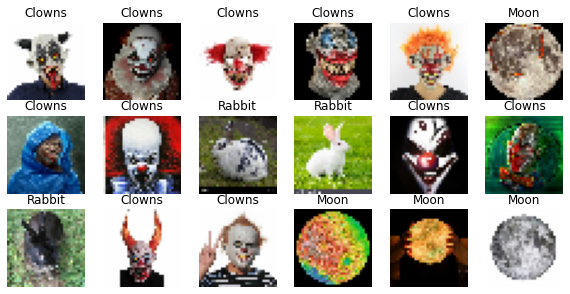

In [9]:
plt.figure(figsize=(10, 10))
class_names = training.class_names

def class_name(one_hot):
    for i, value in enumerate(one_hot):
        if value == 1:
            return class_names[i]

for images, labels in training.take(1):
    for i in range(18):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_name(labels[i]))
        plt.axis("off")

In [14]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

training = training.map(process)
validation = validation.map(process)

def add_block_of_layers(model, filter_num, dropout_rate, add_gap=False):
    model.add(Conv2D(filter_num, (3, 3), padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filter_num, (3, 3), padding='same', activation='relu'))
    if not add_gap:
        model.add(MaxPooling2D(pool_size=(8, 8), strides=(8, 8), padding='same'))
    else:
        model.add(GlobalAvgPool2D())
    model.add(Dropout(dropout_rate))

model = keras.Sequential()
add_block_of_layers(model, 20, 0.1),
add_block_of_layers(model, 40, 0.1),
add_block_of_layers(model, 80, 0.1),
add_block_of_layers(model, 160, 0.1, True),
model.add(Flatten())
model.add(Dense(3, activation=activations.softmax))

model.build([64, 32, 32, 3])
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=.9)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(training, epochs=150, validation_data=validation, verbose=True)

Epoch 1/150
22/22 [==============================] - 3s 70ms/step - loss: 1.1046 - categorical_accuracy: 0.3415 - val_loss: 1.0982 - val_categorical_accuracy: 0.3584
Epoch 2/150
22/22 [==============================] - 2s 57ms/step - loss: 1.0359 - categorical_accuracy: 0.4947 - val_loss: 1.0978 - val_categorical_accuracy: 0.3584
Epoch 3/150
22/22 [==============================] - 2s 59ms/step - loss: 0.9321 - categorical_accuracy: 0.6365 - val_loss: 1.0973 - val_categorical_accuracy: 0.3584
Epoch 4/150
22/22 [==============================] - 2s 60ms/step - loss: 0.8308 - categorical_accuracy: 0.6459 - val_loss: 1.0967 - val_categorical_accuracy: 0.3584
Epoch 5/150
22/22 [==============================] - 2s 63ms/step - loss: 0.7023 - categorical_accuracy: 0.7541 - val_loss: 1.0958 - val_categorical_accuracy: 0.3295
Epoch 6/150
22/22 [==============================] - 2s 66ms/step - loss: 0.5993 - categorical_accuracy: 0.7589 - val_loss: 1.0941 - val_categorical_accuracy: 0.3295
Epoc

22/22 [==============================] - 2s 76ms/step - loss: 0.1635 - categorical_accuracy: 0.9438 - val_loss: 0.4803 - val_categorical_accuracy: 0.8613
Epoch 51/150
22/22 [==============================] - 2s 76ms/step - loss: 0.1631 - categorical_accuracy: 0.9463 - val_loss: 0.3824 - val_categorical_accuracy: 0.8844
Epoch 52/150
22/22 [==============================] - 2s 77ms/step - loss: 0.1399 - categorical_accuracy: 0.9581 - val_loss: 0.4433 - val_categorical_accuracy: 0.8497
Epoch 53/150
22/22 [==============================] - 2s 76ms/step - loss: 0.1865 - categorical_accuracy: 0.9262 - val_loss: 0.3952 - val_categorical_accuracy: 0.8728
Epoch 54/150
22/22 [==============================] - 2s 78ms/step - loss: 0.1775 - categorical_accuracy: 0.9401 - val_loss: 0.3864 - val_categorical_accuracy: 0.8728
Epoch 55/150
22/22 [==============================] - 2s 77ms/step - loss: 0.1456 - categorical_accuracy: 0.9510 - val_loss: 0.3506 - val_categorical_accuracy: 0.8555
Epoch 56/15

22/22 [==============================] - 2s 85ms/step - loss: 0.0477 - categorical_accuracy: 0.9799 - val_loss: 0.6172 - val_categorical_accuracy: 0.8266
Epoch 100/150
22/22 [==============================] - 2s 81ms/step - loss: 0.0754 - categorical_accuracy: 0.9734 - val_loss: 0.4035 - val_categorical_accuracy: 0.8671
Epoch 101/150
22/22 [==============================] - 2s 80ms/step - loss: 0.0751 - categorical_accuracy: 0.9740 - val_loss: 0.5215 - val_categorical_accuracy: 0.8613
Epoch 102/150
22/22 [==============================] - 2s 89ms/step - loss: 0.0746 - categorical_accuracy: 0.9709 - val_loss: 0.5769 - val_categorical_accuracy: 0.8439
Epoch 103/150
22/22 [==============================] - 2s 91ms/step - loss: 0.0391 - categorical_accuracy: 0.9819 - val_loss: 0.4396 - val_categorical_accuracy: 0.8786
Epoch 104/150
22/22 [==============================] - 2s 95ms/step - loss: 0.0991 - categorical_accuracy: 0.9695 - val_loss: 0.6509 - val_categorical_accuracy: 0.8150
Epoch 

Epoch 148/150
22/22 [==============================] - 2s 87ms/step - loss: 0.0289 - categorical_accuracy: 0.9846 - val_loss: 0.4850 - val_categorical_accuracy: 0.8786
Epoch 149/150
22/22 [==============================] - 2s 90ms/step - loss: 0.0460 - categorical_accuracy: 0.9834 - val_loss: 0.5415 - val_categorical_accuracy: 0.8902
Epoch 150/150
22/22 [==============================] - 2s 86ms/step - loss: 0.0305 - categorical_accuracy: 0.9909 - val_loss: 0.4514 - val_categorical_accuracy: 0.8786


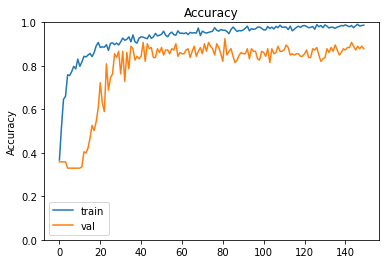

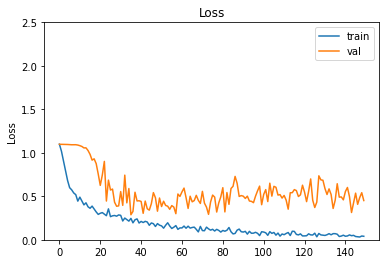

In [15]:
plot_stats(history)

In [22]:
saved_model = keras.models.load_model('models/model_lab3')
saved_model = keras.Model(saved_model.input, outputs=saved_model.layers[-2].output)
saved_model.trainable = False
inputs = keras.Input(shape=(32, 32, 3))
x = inputs
x = saved_model(x, training=False)
outputs = Dense(3, activation=activations.softmax)(x)
new_saved_model = keras.Model(inputs, outputs)
new_saved_model.build([64, 32, 32, 3])

new_saved_model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=[keras.metrics.CategoricalAccuracy()])
history = new_saved_model.fit(training,
                    epochs=150,
                    validation_data=validation,
                    verbose=True)

Epoch 1/150
22/22 [==============================] - 2s 52ms/step - loss: 1.1169 - categorical_accuracy: 0.3495 - val_loss: 1.1040 - val_categorical_accuracy: 0.3584
Epoch 2/150
22/22 [==============================] - 1s 43ms/step - loss: 1.1073 - categorical_accuracy: 0.3603 - val_loss: 1.1045 - val_categorical_accuracy: 0.3584
Epoch 3/150
22/22 [==============================] - 1s 43ms/step - loss: 1.1005 - categorical_accuracy: 0.3764 - val_loss: 1.1010 - val_categorical_accuracy: 0.3584
Epoch 4/150
22/22 [==============================] - 1s 45ms/step - loss: 1.1027 - categorical_accuracy: 0.3795 - val_loss: 1.1046 - val_categorical_accuracy: 0.3584
Epoch 5/150
22/22 [==============================] - 1s 56ms/step - loss: 1.0987 - categorical_accuracy: 0.3900 - val_loss: 1.1007 - val_categorical_accuracy: 0.3584
Epoch 6/150
22/22 [==============================] - 1s 53ms/step - loss: 1.0984 - categorical_accuracy: 0.3909 - val_loss: 1.1057 - val_categorical_accuracy: 0.3584
Epoc

22/22 [==============================] - 1s 53ms/step - loss: 1.0953 - categorical_accuracy: 0.3917 - val_loss: 1.1099 - val_categorical_accuracy: 0.3584
Epoch 51/150
22/22 [==============================] - 2s 55ms/step - loss: 1.0968 - categorical_accuracy: 0.3827 - val_loss: 1.0976 - val_categorical_accuracy: 0.3584
Epoch 52/150
22/22 [==============================] - 1s 53ms/step - loss: 1.0964 - categorical_accuracy: 0.3779 - val_loss: 1.0994 - val_categorical_accuracy: 0.3584
Epoch 53/150
22/22 [==============================] - 2s 54ms/step - loss: 1.0959 - categorical_accuracy: 0.3825 - val_loss: 1.1062 - val_categorical_accuracy: 0.3584
Epoch 54/150
22/22 [==============================] - 2s 55ms/step - loss: 1.0963 - categorical_accuracy: 0.3898 - val_loss: 1.0972 - val_categorical_accuracy: 0.3584
Epoch 55/150
22/22 [==============================] - 2s 55ms/step - loss: 1.0970 - categorical_accuracy: 0.3739 - val_loss: 1.0999 - val_categorical_accuracy: 0.3584
Epoch 56/15

22/22 [==============================] - 2s 56ms/step - loss: 1.0806 - categorical_accuracy: 0.4120 - val_loss: 1.0911 - val_categorical_accuracy: 0.3584
Epoch 100/150
22/22 [==============================] - 2s 56ms/step - loss: 1.0913 - categorical_accuracy: 0.3956 - val_loss: 1.1068 - val_categorical_accuracy: 0.3584
Epoch 101/150
22/22 [==============================] - 2s 56ms/step - loss: 1.0924 - categorical_accuracy: 0.3918 - val_loss: 1.0905 - val_categorical_accuracy: 0.3584
Epoch 102/150
22/22 [==============================] - 2s 56ms/step - loss: 1.0896 - categorical_accuracy: 0.3625 - val_loss: 1.1008 - val_categorical_accuracy: 0.3584
Epoch 103/150
22/22 [==============================] - 2s 56ms/step - loss: 1.0928 - categorical_accuracy: 0.3907 - val_loss: 1.0907 - val_categorical_accuracy: 0.3584
Epoch 104/150
22/22 [==============================] - 2s 56ms/step - loss: 1.0907 - categorical_accuracy: 0.3956 - val_loss: 1.0986 - val_categorical_accuracy: 0.3584
Epoch 

Epoch 148/150
22/22 [==============================] - 2s 57ms/step - loss: 1.0877 - categorical_accuracy: 0.3742 - val_loss: 1.0968 - val_categorical_accuracy: 0.3584
Epoch 149/150
22/22 [==============================] - 2s 58ms/step - loss: 1.1007 - categorical_accuracy: 0.3592 - val_loss: 1.1016 - val_categorical_accuracy: 0.3584
Epoch 150/150
22/22 [==============================] - 2s 61ms/step - loss: 1.0955 - categorical_accuracy: 0.3684 - val_loss: 1.0913 - val_categorical_accuracy: 0.3584


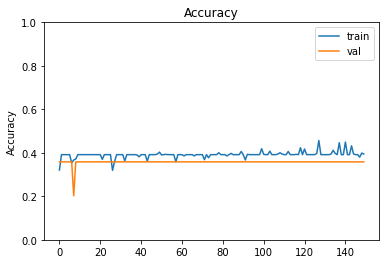

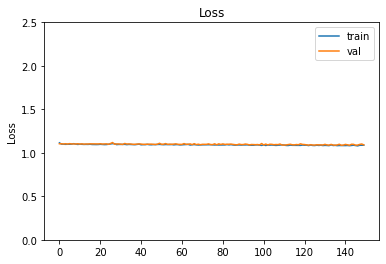

In [23]:
plot_stats(history)

# Xception

In [25]:
training = tf.keras.preprocessing.image_dataset_from_directory(
    root,
    image_size=(256, 256),
    subset='training',
    label_mode='categorical',
    validation_split=.2,
    seed=76
)

validation = tf.keras.preprocessing.image_dataset_from_directory(
    root,
    image_size=(256, 256),
    subset='validation',
    label_mode='categorical',
    validation_split=.2,
    seed=76
)

Found 865 files belonging to 3 classes.
Using 692 files for training.
Found 865 files belonging to 3 classes.
Using 173 files for validation.


In [52]:
from tensorflow.keras.layers import GlobalAveragePooling2D

xception_model = keras.applications.Xception(weights="imagenet", input_shape=(256, 256, 3), include_top=False)
xception_model.trainable = False
inputs = keras.Input(shape=(256, 256, 3))
x = inputs
x = tf.keras.layers.experimental.preprocessing.Rescaling(
    scale=1 / 255.
)(x)

x = xception_model(x, training=False)
x = GlobalAveragePooling2D()(x)

outputs = Dense(3, activation=activations.softmax)(x)
model = keras.Model(inputs, outputs)

In [53]:
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(training, epochs=30, validation_data=validation, verbose=True)

Epoch 1/30
22/22 [==============================] - 88s 4s/step - loss: 1.1089 - categorical_accuracy: 0.4402 - val_loss: 1.0418 - val_categorical_accuracy: 0.4682
Epoch 2/30
22/22 [==============================] - 84s 4s/step - loss: 0.9637 - categorical_accuracy: 0.5745 - val_loss: 0.8957 - val_categorical_accuracy: 0.6705
Epoch 3/30
22/22 [==============================] - 87s 4s/step - loss: 0.8219 - categorical_accuracy: 0.7775 - val_loss: 0.7819 - val_categorical_accuracy: 0.8497
Epoch 4/30
22/22 [==============================] - 91s 4s/step - loss: 0.7236 - categorical_accuracy: 0.8650 - val_loss: 0.6921 - val_categorical_accuracy: 0.9133
Epoch 5/30
22/22 [==============================] - 89s 4s/step - loss: 0.6361 - categorical_accuracy: 0.8990 - val_loss: 0.6197 - val_categorical_accuracy: 0.9306
Epoch 6/30
22/22 [==============================] - 95s 4s/step - loss: 0.5734 - categorical_accuracy: 0.9192 - val_loss: 0.5623 - val_categorical_accuracy: 0.9422
Epoch 7/30
22/22

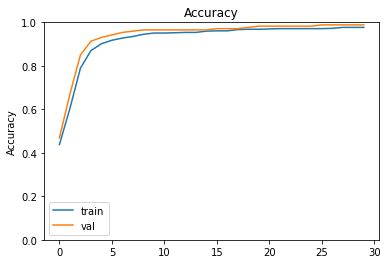

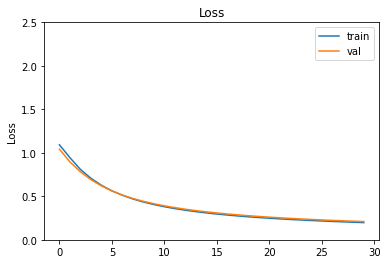

In [54]:
plot_stats(history)

## Fine-tuning

In [55]:
xception_model.trainable = True
opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(training,epochs=13, validation_data=validation, verbose=True)

Epoch 1/13
22/22 [==============================] - 302s 14s/step - loss: 0.1717 - categorical_accuracy: 0.9855 - val_loss: 0.1832 - val_categorical_accuracy: 0.9884
Epoch 2/13
22/22 [==============================] - 294s 13s/step - loss: 0.1514 - categorical_accuracy: 0.9814 - val_loss: 0.1539 - val_categorical_accuracy: 0.9884
Epoch 3/13
22/22 [==============================] - 294s 13s/step - loss: 0.1242 - categorical_accuracy: 0.9863 - val_loss: 0.1327 - val_categorical_accuracy: 0.9884
Epoch 4/13
22/22 [==============================] - 295s 13s/step - loss: 0.1074 - categorical_accuracy: 0.9895 - val_loss: 0.1165 - val_categorical_accuracy: 0.9884
Epoch 5/13
22/22 [==============================] - 295s 13s/step - loss: 0.0871 - categorical_accuracy: 0.9907 - val_loss: 0.1047 - val_categorical_accuracy: 0.9884
Epoch 6/13
22/22 [==============================] - 294s 13s/step - loss: 0.0752 - categorical_accuracy: 0.9946 - val_loss: 0.0950 - val_categorical_accuracy: 0.9884
Epoc

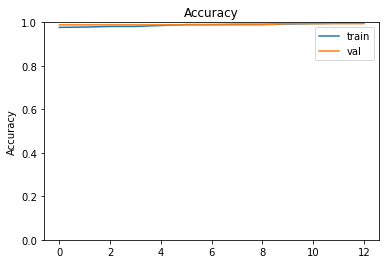

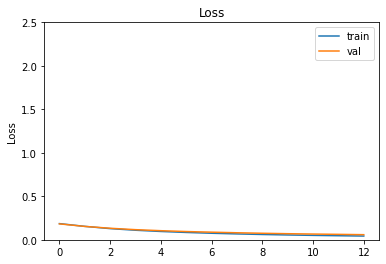

In [57]:
plot_stats(history)

In [58]:
model.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
rescaling_10 (Rescaling)     (None, 256, 256, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_11  (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 6147      
Total params: 20,867,627
Trainable params: 20,813,099
Non-trainable params: 54,528
_________________________________________________________________


In [63]:
inputs = keras.Input(shape=(256, 256, 3))
outputs = tf.keras.layers.experimental.preprocessing.Rescaling(scale=1 / 255.)(inputs)
actual_outputs = xception_model(outputs, training=False)
outputs = model.get_layer("global_average_pooling2d_11")(actual_outputs)
model_to_analyse = keras.Model(inputs, outputs=[actual_outputs, model.get_layer("dense_15")(outputs)], trainable=False)

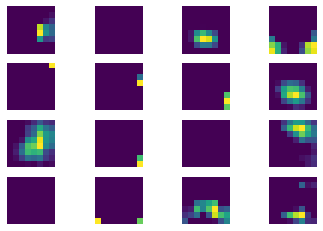

In [81]:
from keras_preprocessing.image import load_img, img_to_array


def load_image(path):
    image = load_img(path)
    numpy_data = img_to_array(image)
    img = tf.convert_to_tensor(numpy_data)
    return tf.image.resize(img, size=tf.constant([256, 256]))

def predict(img):
    img = tf.reshape(img, [1, 256, 256, 3])
    return model_to_analyse.predict(img)

example_image = load_image('images/Clowns/107_d8cf4031.jpg')
activation, _ = predict(example_image)
transposed_result = tf.transpose(activation, [0, 3, 1, 2])
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    r = transposed_result.numpy()[0, i]
    plt.imshow(r)
    plt.axis("off")

plt.show()

In [86]:
from scipy.ndimage import zoom

scale = 256 / 8

def summed_weights_map(img):
    activ, pred = predict(img)
    predicted_class = np.argmax(pred, axis=1).squeeze()
    w, b = model_to_analyse.get_layer("dense_15").weights
    weights = w[:, predicted_class].numpy()
    weights_map = activ.squeeze() @ weights
    plt.figure(figsize=figsize)
    plt.title(f'{pred.squeeze()}', fontsize=11)
    plt.imshow(img / 255.)
    plt.imshow(zoom(weights_map, zoom=(scale, scale)), alpha=0.3)


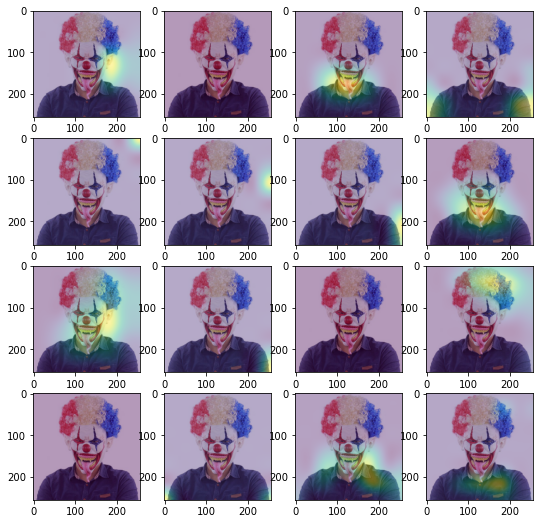

In [83]:
activ, pred = predict(example_image)
plt.figure(figsize=figsize)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(example_image / 255.)
    x = zoom(activ[0, :,:, i], zoom=(scale, scale))
    plt.imshow(zoom(activ[0, :,:, i], zoom=(scale, scale)), alpha=.4)

plt.show()

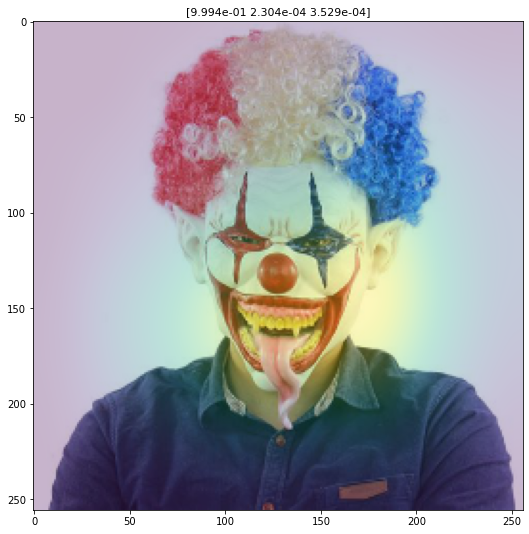

In [87]:
summed_weights_map(example_image)

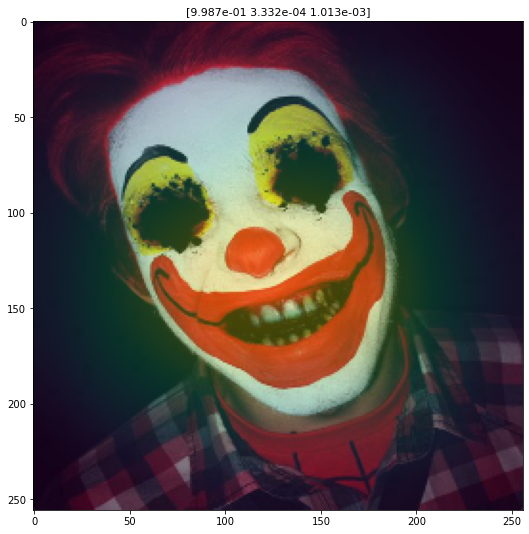

In [88]:
clown_2 = load_image('images/Clowns/006_26de2a44.jpg')
summed_weights_map(clown_2)

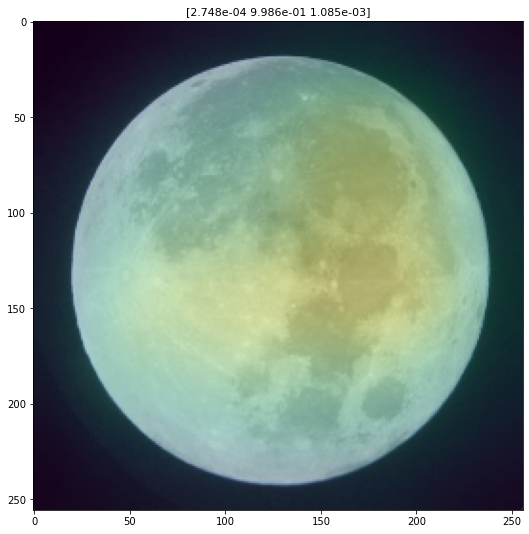

In [93]:
moon_1 = load_image('images/Moon/001_bc7d5fb6.jpg')
summed_weights_map(moon_1)

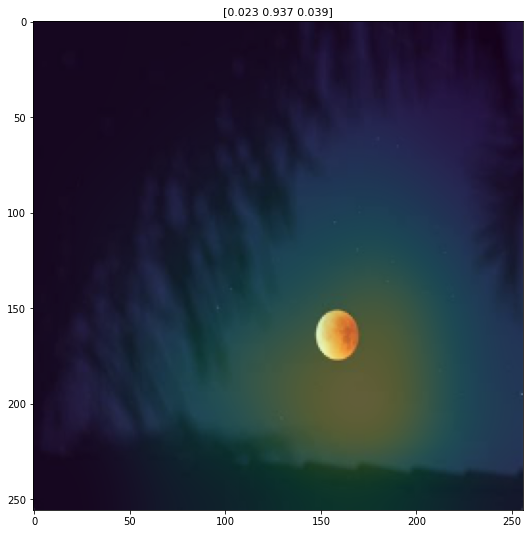

In [94]:
moon_2 = load_image('images/Moon/173_7f063da0.jpg')
summed_weights_map(moon_2)

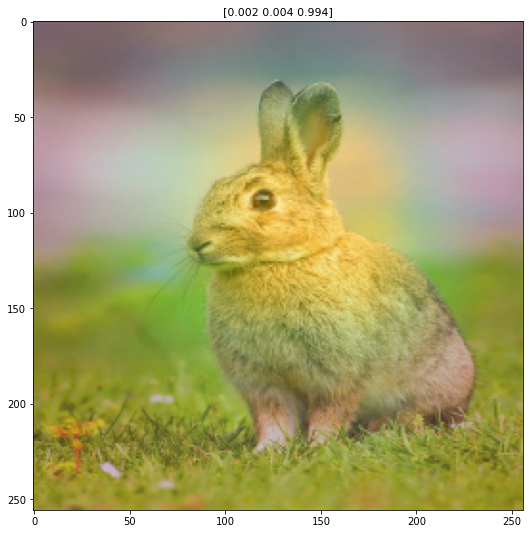

In [95]:
rabbit_1 = load_image('images/Rabbit/003_645e2f7e.jpg')
summed_weights_map(rabbit_1)

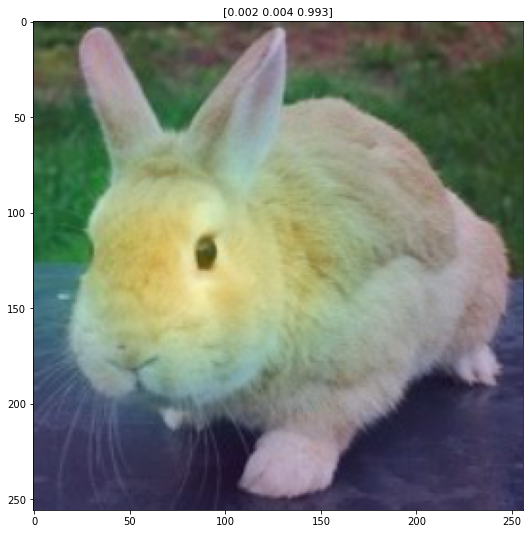

In [96]:
rabbit_2 = load_image('images/Rabbit/068_259504fd.jpg')
summed_weights_map(rabbit_2)

In [106]:
labels = []
imgs = []
for item in validation.as_numpy_iterator(): 
    labels.append(np.argmax(item[1], axis=1))
    imgs.append(item[0])
    

print(labels)
labels = np.concatenate(labels)
print(labels)
imgs = np.concatenate(imgs)

[array([2, 0, 2, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1,
       1, 1, 0, 2, 0, 1, 0, 2, 2, 1], dtype=int64), array([2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0,
       0, 2, 0, 1, 1, 2, 0, 0, 1, 1], dtype=int64), array([1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 2, 0, 2, 1], dtype=int64), array([0, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 0, 0, 2, 2, 0], dtype=int64), array([0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 1, 0, 0, 0], dtype=int64), array([2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0], dtype=int64)]
[2 0 2 2 0 1 1 2 0 0 2 2 0 1 2 0 2 1 1 2 0 1 1 1 0 2 0 1 0 2 2 1 2 2 0 1 2
 0 1 1 1 0 0 2 1 1 0 0 1 2 0 1 1 0 0 2 0 1 1 2 0 0 1 1 1 2 2 0 0 0 0 0 0 1
 1 2 0 2 2 2 2 2 0 0 0 2 1 0 2 1 0 1 2 0 2 1 0 1 1 2 0 1 1 1 2 0 2 1 1 1 2
 0 2 2 2 1 2 2 1 0 2 2 1 0 0 2 2 0 0 0 2 2 1 2 2 2 1 1 1 0 1 2 0 2 1 1 0 1
 0 1 0 0 2 1 

In [107]:
predictions = np.argmax(model.predict(imgs), axis=1)

In [108]:
wrong_predictions = imgs[predictions != labels]
wrong_predictions.shape

(1, 256, 256, 3)

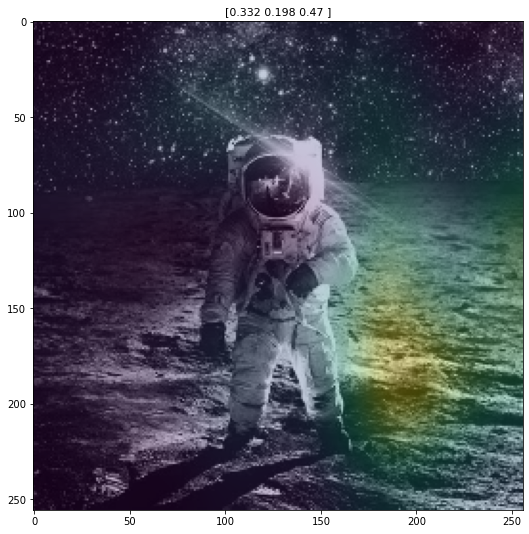

In [109]:
summed_weights_map(wrong_predictions[0, :, :, :])